## 한국어 자연어 처리

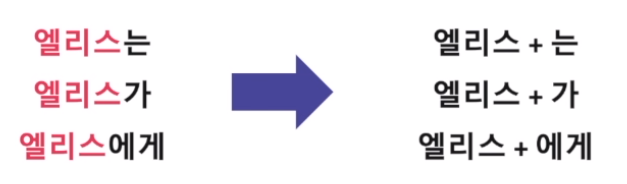
한국어에서 단어의 기준은 불명확하다. 그래서 의미적인 부분과 문법적인 부분을 구분하여 한국어 텍스트를 단어의 원형 형태로 분리해주는 형태소 분석 작업이 중요하다.

## KoNLPy

KoNLPy는 여러 한국어 형태소 사전을 기반으로 한국어 단어를 추출해 주는 라이브러리이다.
- 포함된 형태소 사전들
    - Mecab
    - 한나눔
    - 꼬꼬마
    - Komoran
    - Open Korean Text
    
- 각 형태소 호출 방식
    - Hannanum()
    - Kkman()
    - Komoran(userdict=경로)
    - Mecab()
    - Okt()
    
```python
from konlpy.tag import Kkma, Okt

kkma = Kkma()
okt = Okt()
```

- 한국어 형태소 분석

```python
from konlpy.tag import Kkma

sent = "안녕 나는 승주야 너는 이름이 뭐니?"

kkma = Kkma()

print(kkma.nouns(sent))
print(kkma.pos(sent))
print(kkma.sentences(sent))
```


In [1]:
from konlpy.tag import Kkma

sent = "안녕 나는 승주야 너는 이름이 뭐니?"

kkma = Kkma()

print(kkma.nouns(sent)) # 명사 반환
print(kkma.pos(sent)) # NNG는 명사
print(kkma.sentences(sent))

['안녕', '승', '승주야', '주야', '이름', '뭐']
[('안녕', 'NNG'), ('나', 'VV'), ('는', 'ETD'), ('승', 'NNG'), ('주야', 'NNG'), ('널', 'VV'), ('는', 'ETD'), ('이름', 'NNG'), ('이', 'JKS'), ('뭐', 'NP'), ('니', 'JC'), ('?', 'SF')]
['안녕 나는 승 주야 너는 이름이 뭐니?']


### KoNLPy를 통한 한국어 전처리

In [4]:
# 경고문을 무시합니다.
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
from konlpy.tag import Kkma, Okt

# sts-train.tsv 파일에 저장되어 있는 KorSTS 데이터셋을 불러옵니다.
sent = pd.read_table("sts-train.tsv", delimiter='\t', header=0)['sentence1']

# sent 변수에 저장된 첫 5개 문장 확인
print(sent[:5])

kkma = Kkma()
nouns = []

for s in sent:
    # append 대신 하나의 리스트로 저장
    nouns += kkma.nouns(s)

# 명사 종류 확인
print(set(nouns))
print()

# Open Korean Text 형태소 사전을 이용해서 sent 내 형태소 분석 결과를 pos_results 리스트에 저장하세요.
okt = Okt()
pos_results = []

for s in sent:
    pos_results.append(okt.pos(s))

# 분석 결과를 확인해봅니다.
print(pos_results)
print()

# stemming 기반 형태소 분석이 적용된 sent의 두 번째 문장을 stem_pos_results 리스트에 저장하세요.
stem_pos_results = []
stem_pos_results = okt.pos(sent[1], stem = True)

print(stem_pos_results)

0             비행기가 이륙하고 있다.
1     한 남자가 큰 플루트를 연주하고 있다.
2    한 남자가 피자에 치즈를 뿌려놓고 있다.
3          세 남자가 체스를 하고 있다.
4        한 남자가 첼로를 연주하고 있다.
Name: sentence1, dtype: object
{'피자', '사자', '동상', '추', '공', '막대기', '빵', '아이', '북극곰', '말', '아기', '장', '피아노', '눈', '여자', '기름', '연', '조각', '천장', '새끼', '연주', '이륙', '담배', '등에', '얼굴', '감자', '팬', '생선', '호랑이', '위', '자전거', '남', '자가', '글', '소녀', '튀김', '남자가', '기타', '토마토', '냄비', '소년', '플루트', '도로', '종이', '치즈', '일렉트릭', '스케이트보드', '비행기', '키보드', '후추', '개가', '독수리', '누군가', '캥거루', '이드', '돼지고기', '보드', '새우', '후', '토끼', '기계식', '남자', '첼로', '노래', '스케이트', '판다', '껍질', '고양이', '드럼', '양파', '황소', '아래', '베이컨', '사람', '체스', '여성'}

[[('비행기', 'Noun'), ('가', 'Josa'), ('이륙', 'Noun'), ('하고', 'Josa'), ('있다', 'Adjective'), ('.', 'Punctuation')], [('한', 'Verb'), ('남자', 'Noun'), ('가', 'Josa'), ('큰', 'Verb'), ('플루트', 'Noun'), ('를', 'Josa'), ('연주', 'Noun'), ('하고', 'Josa'), ('있다', 'Adjective'), ('.', 'Punctuation')], [('한', 'Verb'), ('남자', 'Noun'), ('가', 'Josa'), ('피자', 'Noun'), ('에', 'Josa'),

## Soynlp를 통한 한국어 전처리

![image.png](attachment:image.png)

Soynlp은 한국어 자연어처리 라이브러리이다. 사전 기반 단어 처리의 경우 미등록 단어 문제가 발생할 수 있다. Soynlp은 사전을 사용하지 않고 학습 데이터 내 자주 발생하는 패턴을 기반으로 단어의 경계선을 구분한다.

- 단어는 연속으로 등장하는 글자의 조합이며 글자 간의 연관성이 높다는 가정

- 한국어 어절은 좌 > 우 구조로 2등분 할 수 있다.
    - ex) 소말리아에서 > 소말리아(의미적 기능) + 에서(문법적 기능)
- 사용방법

```python
from soynlp.utils import DoublespaceLineCorpus
from soynlp.word import WordExtractor
from soynlp.noun import LRNounExtractor_v2

train_data = DoublespaceLineCorpus(학습데이터 경로) # 데이터 기반 패턴 학습

noun_extractor = LRNounExtractor_v2()
nouns = noun_extractor.train_extract(train_data) # [할리우드, 모바일 게임...

word_extractor = WordExtractor()
words = word_extractor.train_extract(train_data) # [클린턴, 트럼프, 프로그램..
```

In [2]:
from soynlp.utils import DoublespaceLineCorpus
from soynlp.noun import LRNounExtractor_v2

sent = '트와이스 아이오아이 좋아여 tt가 저번에 1위 했었죠?'

# 학습에 사용할 데이터가 train_data에 저장되어 있습니다.
corpus_path = 'articles.txt'
train_data = DoublespaceLineCorpus(corpus_path)
print("학습 문서의 개수: %d" %(len(train_data)))

# LRNounExtractor_v2 객체를 이용해 train_data에서 명사로 추정되는 단어를 nouns 변수에 저장하세요.
noun_extractor = LRNounExtractor_v2()
nouns = noun_extractor.train_extract(train_data)

# 생성된 명사의 개수를 확인해봅니다.
print(len(nouns))

# 생성된 명사 목록을 사용해서 sent에 주어진 문장에서 명사를 sent_nouns 리스트에 저장하세요.
sent_nouns = []
for word in sent.split():
    if word in nouns:
        sent_nouns.append(word)



print(sent_nouns)

학습 문서의 개수: 30091
[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 403896 from 30091 sents. mem=0.712 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=4434442, mem=0.901 Gb
[Noun Extractor] batch prediction was completed for 119705 words
[Noun Extractor] checked compounds. discovered 70639 compounds
[Noun Extractor] postprocessing detaching_features : 109312 -> 92205
[Noun Extractor] postprocessing ignore_features : 92205 -> 91999
[Noun Extractor] postprocessing ignore_NJ : 91999 -> 90643
[Noun Extractor] 90643 nouns (70639 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=1.023 Gb                    
[Noun Extractor] 76.63 % eojeols are covered
90643
['트와이스', '아이오아이', '1위']


## 자카드(Jaccard) 지수를 통한 문장 유사도 측정
- 자카드 지수는 문장 간 공통된 단어의 비율로 문장 간 유사도를 정의

$문장1과 문장2의 유사도 = \frac{(두 문장 내 공통된 단어의 종류)}{(두 문장 내 모든 단어의 종류)}$

- 자카드 지수는 문장 간 유사도를 0 ~ 1 사이로 정의


In [ ]:
import nltk

sent_1 = "오늘 중부지방을 중심으로 소나기가 예상됩니다"
sent_2 = "오늘 전국이 맑은 날씨가 예상됩니다"

def cal_jaccard_sim(sent1, sent2):
    # 각 문장을 토큰화 후 set 타입으로 변환하세요.
    words_sent1 = 0
    words_sent2 = 0

    # 공통된 단어의 개수를 intersection 변수에 저장하세요.
    intersection = 0
    
    # 두 문장 내 발생하는 모든 단어의 개수를 union 변수에 저장하세요.
    union = 0

    # intersection과 union을 사용하여 자카드 지수를 계산하고 float 타입으로 반환하세요.
    return 0

# cal_jaccard_sim() 함수 실행 결과를 확인합니다.
print(cal_jaccard_sim(sent_1, sent_2))

# nltk의 jaccard_distance() 함수를 이용해 자카드 유사도를 계산하세요.
nltk_jaccard_sim = 0

# 직접 정의한 함수와 결과가 같은지 비교합니다.
print(nltk_jaccard_sim)